# Anexo: Códigos Utilizados

## P1 Suma de dos dados

In [2]:
#Librerías a Utilizar
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

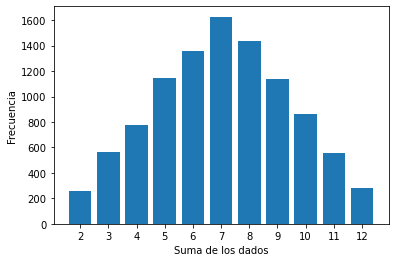

Para la suma de dados igual a 7, la simulación de MC estimó una probabilidad de 0.1627; la probabilidad teórica es de 0.1667; se obtuvo un error del 2.3995%.


In [3]:
iteraciones=10000

# diccionario almacena cuentas de las sumas
suma_dict = {
    '2':0,
    '3':0,
    '4':0,
    '5':0,
    '6':0,
    '7':0,
    '8':0,
    '9':0,
    '10':0,
    '11':0,
    '12':0
}

# Iteración para lanzadas de dados
lanzada=0
for i in range(iteraciones):
    dado1 = random.randint(1,6)
    dado2 = random.randint(1,6)
    suma = dado1 + dado2
    suma_dict[str(suma)]+=1
    lanzada+=1
    
# Histograma
plt.bar(range(len(suma_dict)), list(suma_dict.values()), align='center')
plt.xticks(range(len(suma_dict)), list(suma_dict.keys()))
plt.xlabel("Suma de los dados")
plt.ylabel("Frecuencia")
plt.savefig(f'dados_{iteraciones}.png')
plt.show()

#Probabilidad de tener 7
MC7 = suma_dict['7']/lanzada
P7 = round(6/36,4)
error = round(abs(MC7-P7)/P7*100,4)
print(f'Para la suma de dados igual a 7, la simulación de MC estimó una probabilidad de {str(MC7)}; la probabilidad teórica es de {P7}; se obtuvo un error del {error}%.')

## P2 Aproximación de PI

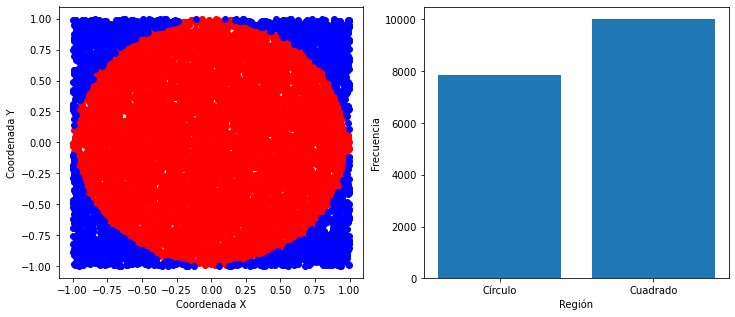

La simulación de MC estimó un pi de 3.1444; el valor de pi teórico es igual a 3.141592653589793; se obtuvo un error del 0.0894%.


In [14]:
iteraciones=10000

# puntos_cuad y puntos_circ: contador de puntos y listas de las coordenadas, 
# xc e yc: coordenadas de los puntos dentro del círculo
# xb e yb: coordenadas de los puntos dentro del cuadrado pero fuera del círculo
puntos_cuad=0
puntos_circ=0
coord_xc=[]
coord_yc=[]
coord_xb=[]
coord_yb=[]

# Iteración para asignación de coordenadas aleatorias a puntos
for i in range(iteraciones):
    
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    
    r = (x**2 + y**2)**0.5
    
    if r<=1:
        puntos_circ+=1
        coord_xc.append(x)
        coord_yc.append(y)
    else:
        coord_xb.append(x)
        coord_yb.append(y)
    puntos_cuad+=1
    
# Gráficos e Histogramas
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(coord_xc,coord_yc,'ro')
ax1.plot(coord_xb,coord_yb,'bo')
ax2.bar(['Círculo','Cuadrado'], [puntos_circ,puntos_cuad], align='center')
ax1.set_ylabel("Coordenada Y")
ax1.set_xlabel("Coordenada X")
ax2.set_ylabel("Frecuencia")
ax2.set_xlabel("Región")
plt.savefig(f'dados_{iteraciones}.png')
plt.rcParams['figure.figsize'] = 12,5
plt.savefig(f'pi_{iteraciones}.png')
plt.show()

#Probabilidad de caer en el círculo
MCpi = 4*puntos_circ/iteraciones
error = round(abs(MCpi-np.pi)/np.pi*100,4)
print(f'La simulación de MC estimó un pi de {MCpi}; el valor de pi teórico es igual a {np.pi}; se obtuvo un error del {error}%.')

## P3 Confiabilidad de un componente

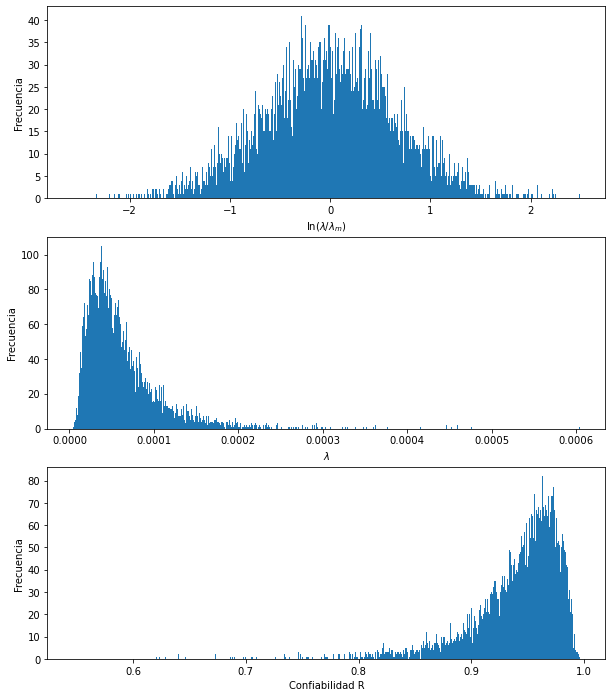

the most frequent bin:(0.962895565552615,0.9633452432655178)
the mode:0.9631204044090664


In [11]:
iteraciones = 10000
lambda_m = 5*10**(-5) #1/hr

# Parámetros de distribución log-normal
sigma = np.log(3)/st.norm.ppf(0.95)
mu = 0

# Iteración de para variable "x" que distribuye normal
# x = ln(lambda/lambda_m)
# f_lambda = lambda
# R = R(t)
x = np.random.normal(0, sigma, iteraciones)
f_lambda = np.exp(x)*lambda_m
R = np.exp(-f_lambda*1000)

# Histogramas
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.hist(x, bins=int(iteraciones/10))
ax2.hist(f_lambda, bins=int(iteraciones/10))
ax1.set_ylabel("Frecuencia")
ax1.set_xlabel(r"ln($\lambda$/$\lambda_m$)")
ax2.set_ylabel("Frecuencia")
ax2.set_xlabel(r"$\lambda$")
plt.savefig(f'dados_{iteraciones}.png')
plt.rcParams['figure.figsize'] = 12,5
plt.savefig(f'pi_{iteraciones}.png')
n, bins, patches = ax3.hist(R, bins=int(iteraciones/10))
ax3.set_ylabel("Frecuencia")
ax3.set_xlabel("Confiabilidad R")
plt.rcParams['figure.figsize'] = 10,12
plt.savefig(f'R_{iteraciones}.png')
plt.show()

# Cálculo de Confiabilidad R mediante intervalo del histograma más frecuente
mode_index = n.argmax()
# the most frequent bin
print('the most frequent bin:(' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')
# the mode         
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2))
plt.show()

In [5]:
# Comparación con R teórico
R_teo = np.exp(-lambda_m*1000)
R_100 = 0.9585070835474612
R_1000 = 0.9524229162459326
R_10000 = 0.9654692063025836
error = round(abs(R_teo-R_10000)/R_teo*100,4)
error

1.497